<a href="https://colab.research.google.com/github/urbnzazo25/MLDL22-23/blob/main/Lab1/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

In [ ]:
# !git clone https://github.com/urbnzazo25/MLDL22-23.git

In [1]:
import sklearn
from sklearn.datasets import load_digits, load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd

In [3]:
X, y = load_digits(return_X_y=True)

In [ ]:
X[0].shape

In [4]:
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs, shuffle=True, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
regressor = LogisticRegression(solver='lbfgs')
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, average='weighted')

In [ ]:
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1 score: {f1}")

### Ex 1

In [ ]:
iris = load_iris()
#X = iris.data
y1 = iris.target

In [ ]:
print(y)

In [ ]:
np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

for name, label in [(str(i), i) for i in range(0, 10)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y1, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
X1 = scaler.fit_transform(X)
cov = np.cov(X1, rowvar=False)

In [ ]:
w, v = np.linalg.eig(cov)

In [ ]:
idx = np.argsort(w)[::-1]

In [ ]:
v = v[:, idx]

In [ ]:
X_pca = X1 @ v[:, [i for i in range(0, 15)]]

In [ ]:
np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()

for name, label in [(str(i), i) for i in range(0, 10)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y1, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

### Ex 2

In [ ]:
# !git clone https://github.com/zalandoresearch/fashion-mnist.git

In [5]:
import sys
sys.path.append(r'fashion-mnist\utils')
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

In [ ]:
n = 6
scaler = MaxAbsScaler()
X_t = scaler.fit_transform(X_train)
X_t = PCA(n_components=n).fit_transform(X_t)

In [ ]:
idx = np.where(y_train == 0)[0]

In [ ]:
X_t, y_t = X_t[idx, :], y_train[idx]

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 6))
sample = X_t[np.random.choice(X_t.shape[0], 15, replace=False), :]
for i, ax in enumerate(axs.flat):
    ax.imshow(sample[i,:].reshape(2, 3), cmap='gray')

##### Now last six eigenvalues

In [ ]:
X_t = scaler.fit_transform(X_train)

In [ ]:
cov = np.cov(X_t, rowvar=False)
w, v = np.linalg.eig(cov)

In [ ]:
idx = np.argsort(w)
v = v[:, idx]

In [ ]:
X_pca = X_t @ v[:, [i for i in range(0, 6)]]

In [ ]:
idx0 = np.where(y_train == 0)[0]

In [ ]:
X_pca, y_t = X_pca[idx0, :], y_train[idx0]

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 6))
sample = X_pca[np.random.choice(X_pca.shape[0], 15, replace=False), :]
for i, ax in enumerate(axs.flat):
    ax.imshow(sample[i,:].reshape(2, 3), cmap='gray')

### Ex 3

In [6]:
import torch
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)
y.sub_(x)
print(y)
z = x.reshape(4, -1)
z

tensor([[0.5560, 0.2625],
        [0.6122, 0.3028]])
tensor([[0.3419, 0.3880],
        [0.6914, 0.6475]])
tensor([[-0.2141,  0.1255],
        [ 0.0792,  0.3447]])


tensor([[0.5560],
        [0.2625],
        [0.6122],
        [0.3028]])

In [ ]:
a = torch.tensor([1., 2., 3.])
b = torch.ones(3, 1)*2

In [ ]:
torch.matmul(a, b)

### Ex 4

In [17]:
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms

In [48]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 64

In [9]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [13]:
path  = './cifar-10-batches-py/'

In [49]:
class DatasetCIFAR10(Dataset):
    def __init__(self, path, train=True, transform=None):
        super().__init__()
        if train:
            for i in range(1, 6):
                fp = path + f'data_batch_{i}'
                db = unpickle(fp)
                data = np.array(db[b'data'])
                labels = np.array(db[b'labels']).reshape(data.shape[0], 1)
                dataset = np.concatenate([labels, data], axis=1)
                if i == 1:
                    self.data = dataset
                else:
                    self.data = np.concatenate([self.data, dataset])
        else:
            fp = path + 'test_batch'
            db = unpickle(fp)
            data = np.array(db[b'data'])
            labels = np.array(db[b'labels']).reshape(data.shape[0], 1)
            self.data = np.concatenate([labels, data], axis=1)
        self.transform = transform
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        image = self.data[index, 1:]
        r = image[:1024].reshape(1024, 1)
        g = image[1024:2048].reshape(1024, 1)
        b = image[2048:].reshape(1024, 1)
        image = np.hstack((r, g, b))
        image = image.reshape(32, 32, 3)
        image = np.array(image, dtype=np.uint8)
        label = self.data[index, 0]
        if self.transform:
            return self.transform(image), label
        return image.reshape(3, 32, 32), label

In [50]:
train_data = DatasetCIFAR10(path, train=True, transform=transform)
test_data = DatasetCIFAR10(path, train=False, transform=transform)

In [51]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

### Ex 4

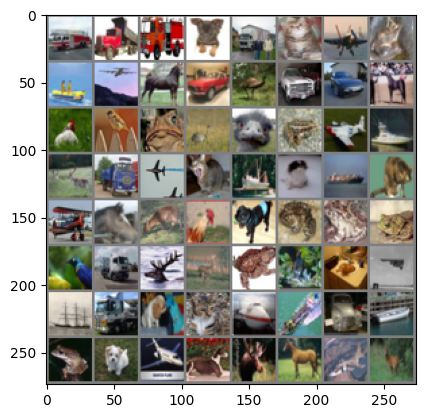

truck truck truck dog   truck cat   plane frog  ship  plane horse car   bird  car   car   horse bird  bird  frog  bird  bird  frog  plane ship  deer  truck plane cat   ship  dog   ship  cat   plane horse deer  bird  dog   frog  frog  frog  bird  truck deer  deer  frog  bird  cat   plane ship  truck dog   cat   plane ship  car   ship  frog  dog   plane dog   deer  horse plane deer 
Finished Training


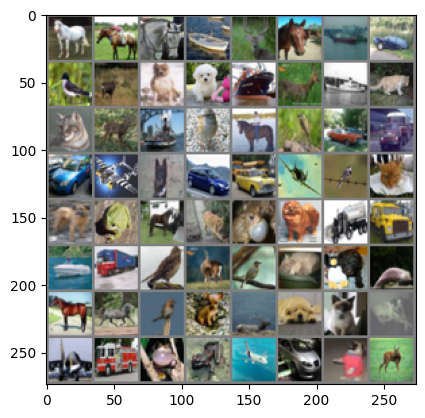

GroundTruth:  horse horse horse ship 
Predicted:  car   bird  truck car  
Accuracy of the network on the 10000 test images: 24 %
Accuracy for class: plane is 18.2 %
Accuracy for class: car   is 27.3 %
Accuracy for class: bird  is 8.5 %
Accuracy for class: cat   is 0.2 %
Accuracy for class: deer  is 0.2 %
Accuracy for class: dog   is 38.2 %
Accuracy for class: frog  is 25.1 %
Accuracy for class: horse is 40.3 %
Accuracy for class: ship  is 39.1 %
Accuracy for class: truck is 49.0 %


In [53]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels = labels.to(torch.long)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.to(torch.long)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


dataiter = iter(test_loader)
images, labels = next(dataiter)
labels = labels.to(torch.long)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))



net = Net()
net.load_state_dict(torch.load(PATH))


outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))



correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        labels = labels.to(torch.long)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        labels = labels.to(torch.long)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')